In [196]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
data = pd.read_csv('/content/creditcard.csv')

In [198]:
pd.options.display.max_columns = None

**Data Analysis**

In [199]:
data.shape

(284807, 31)

In [200]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [201]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [203]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [204]:
null = data.isnull().sum().sum()
print(f"Number of null values in the whole dataset: {null}")

Number of null values in the whole dataset: 0


In [205]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

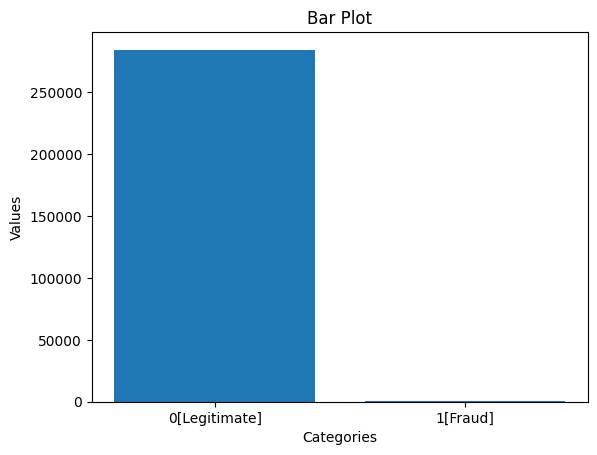

In [206]:
categories = ['0[Legitimate]', '1[Fraud]']
values = [data[data['Class']==0].shape[0], data[data['Class']==1].shape[0]]

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot')
plt.show()

**Data Preprocessing**

Duplicate values

In [207]:
#checking for duplicate values
data.duplicated().any()

True

In [208]:
#removing duplicate values
data = data.drop_duplicates()

In [209]:
data.duplicated().any() #duplicate values removed

False

Null Values: (As Dataset didn't have any null values to begin with, we are inserting null values for demonstration purposes)

In [210]:
np.random.seed(0)
for _ in range(10):
    random_row_index = np.random.randint(0, len(data))
    random_column = np.random.choice(data.columns[~data.columns.isin(['Amount', 'Time'])])
    data.at[random_row_index, random_column] = np.nan

# Display the number of null values
total_null_values = data.isnull().sum().sum()
print(f"Total number of null values in the dataset: {total_null_values}")

Total number of null values in the dataset: 10


In [211]:
data.isnull().sum()

Time      0
V1        0
V2        1
V3        0
V4        2
V5        0
V6        0
V7        1
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       0
V15       0
V16       1
V17       0
V18       1
V19       0
V20       0
V21       0
V22       1
V23       0
V24       1
V25       0
V26       1
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [212]:
data = data.dropna()
print(f"Total number of null values in the dataset after removal:", data.isnull().sum().sum())

Total number of null values in the dataset after removal: 0


In [213]:
#highly imbalanced data

In [214]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [215]:
normal.shape

(283243, 31)

In [216]:
fraud.shape

(473, 31)

Executing undersampling

In [217]:
normal_sample=normal.sample(n = fraud.shape[0])
normal_sample.shape

(473, 31)

In [218]:
cred_data = pd.concat([normal_sample,fraud],ignore_index=True)
cred_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [219]:
cred_data.shape

(946, 31)

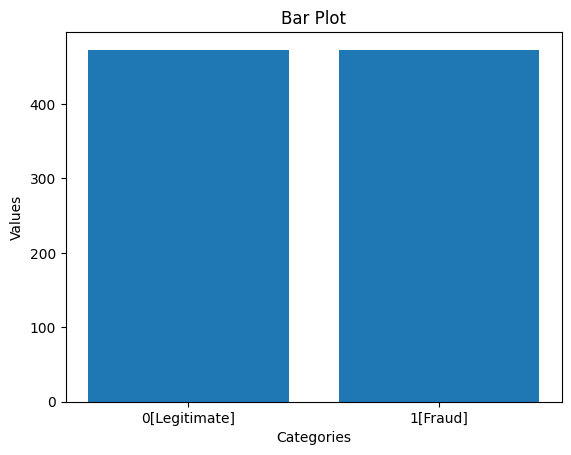

In [220]:
categories = ['0[Legitimate]', '1[Fraud]']
values = [cred_data[cred_data['Class']==0].shape[0], cred_data[cred_data['Class']==1].shape[0]]

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot')
plt.show()

In [221]:
#checking if there is any categorical values in the dataset
data_type = cred_data.dtypes

# Filter columns with object or category data type
categorical_column = data_type[data_type == 'object'].index.tolist()

if len(categorical_column) > 0:
  print("Categorical columns:", categorical_column)
else:
  print("There are no categorical columns in the dataset.")

There are no categorical columns in the dataset.


There's no need to implement categorical encoding.

Feature Scaling

In [222]:
scaler = StandardScaler()
cred_data['Amount'] = scaler.fit_transform(pd.DataFrame(cred_data['Amount']))

In [223]:
cred_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,117109.0,-0.367891,1.088914,-2.227515,-2.319081,3.652836,2.756408,1.257847,0.412088,-0.027121,0.368588,-0.012256,-0.193134,-0.503566,0.577976,0.301481,-0.864129,-0.604813,-0.561952,-0.316726,0.323340,0.132195,0.781025,-0.231532,0.747014,-0.197973,0.089620,0.461280,0.159930,-0.389677,0
1,13819.0,1.302131,0.041913,0.469793,0.073850,-0.257537,-0.280825,-0.338909,-0.171775,1.658952,-0.559372,-0.094481,-2.338480,2.491857,1.357868,0.557498,0.778948,-0.080706,0.114526,0.127389,-0.001339,-0.394095,-0.910820,0.021071,-0.624045,0.132002,0.808439,-0.090425,0.002488,-0.313764,0
2,50990.0,-0.787970,1.774479,0.019038,0.683082,0.227664,-0.929336,0.911398,-0.295134,-0.248374,1.409887,1.532323,1.076697,0.505992,0.291446,-0.062685,-0.544536,-0.404574,0.165623,0.543078,0.291124,0.219015,0.768441,0.087097,0.557313,-0.686527,-0.490011,0.102525,0.340004,-0.391691,0
3,48699.0,1.157685,0.075873,0.216586,1.331065,-0.074106,0.008766,0.016726,0.058544,0.459865,-0.103449,-1.022713,-0.102150,-1.031122,0.240136,0.040394,-0.570749,0.188501,-0.738960,-0.230842,-0.207041,-0.126626,-0.210416,-0.109301,-0.291037,0.672521,-0.289015,0.029990,0.013177,-0.307155,0
4,118939.0,2.045602,0.302213,-1.578680,1.372963,0.504070,-1.122643,0.677859,-0.453023,0.106009,0.242594,-0.884156,0.661299,0.389808,0.401244,-0.589097,-0.763554,-0.173176,-0.733656,-0.216097,-0.274834,0.051152,0.426876,-0.006055,-0.015576,0.486217,-0.489272,-0.009005,-0.062205,-0.391302,0


**Data Visualization**

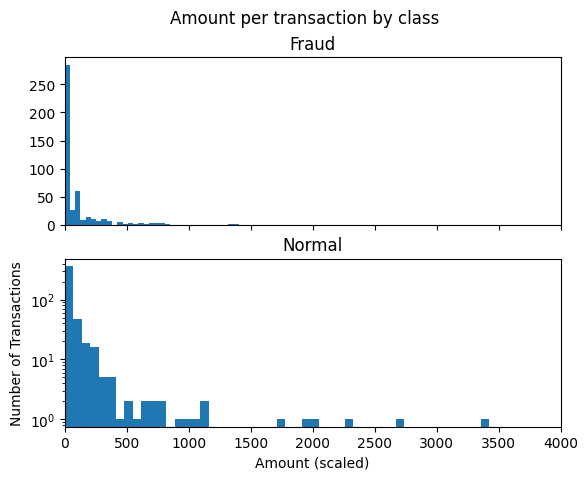

In [224]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal_sample.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount (scaled)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 4000))
plt.yscale('log')
plt.show();

<Axes: >

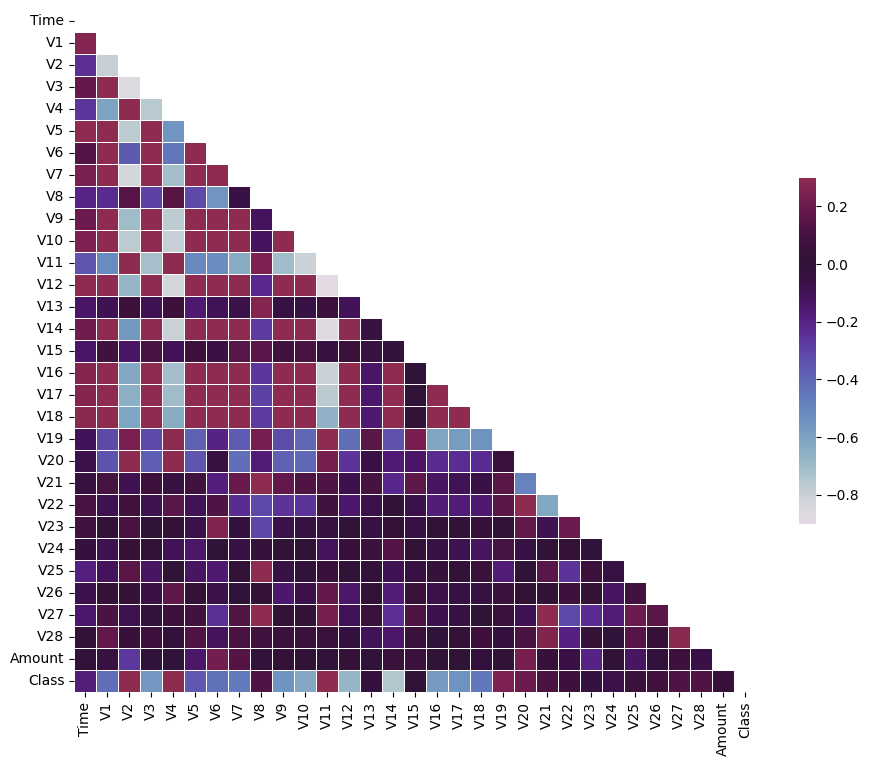

In [225]:
corr = cred_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette('twilight', as_cmap=True)

#Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Storing Feature Matrix In X And Response (Target) In Vector y**

In [226]:
X = cred_data.drop('Class',axis=1)
y = cred_data['Class']

**Splitting the dataset**

In [227]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42, stratify = y)

**Random Forest Classifier**

In [228]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [229]:
y_pred_rfc = rfc.predict(X_test)

In [230]:
test_data_accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print(f"Accuracy score: {test_data_accuracy_rfc}")
print("Precision score: ", precision_score(y_test,y_pred_rfc))
print("Recall score: ", recall_score(y_test,y_pred_rfc))
print("F1 score: ", f1_score(y_test,y_pred_rfc))

Accuracy score: 0.9471830985915493
Precision score:  0.9774436090225563
Recall score:  0.9154929577464789
F1 score:  0.9454545454545454


In [231]:
confusion_matrix(y_test, y_pred_rfc)

array([[139,   3],
       [ 12, 130]])

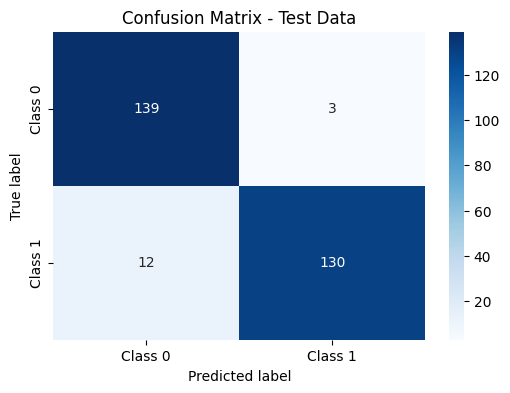

In [232]:
random_forest_classifier_test = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(6, 4))
sns.heatmap(random_forest_classifier_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

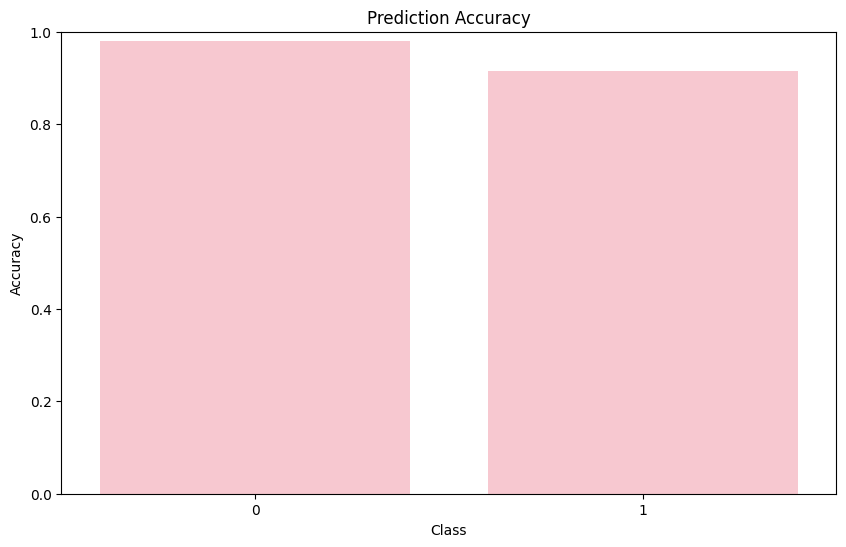

In [233]:
class_accuracy = random_forest_classifier_test.diagonal() / random_forest_classifier_test.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x = rfc.classes_, y= class_accuracy, color='pink')
plt.title('Prediction Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**K-Nearest Neighbor(KNN)**

In [234]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [235]:
y_pred_knn = knn.predict(X_test)

In [236]:
test_data_accuracy_knn = accuracy_score(y_test,y_pred_knn)
print(f"Accuracy score: {test_data_accuracy_knn}")
print("Precision score: ", precision_score(y_test,y_pred_knn))
print("Recall score: ", recall_score(y_test,y_pred_knn))
print("F1 score: ", f1_score(y_test,y_pred_knn))

Accuracy score: 0.6302816901408451
Precision score:  0.6209150326797386
Recall score:  0.6690140845070423
F1 score:  0.6440677966101694


In [237]:
confusion_matrix(y_test, y_pred_knn)

array([[84, 58],
       [47, 95]])

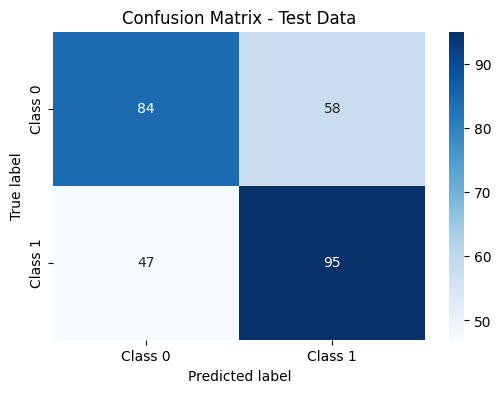

In [238]:
knn_test = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

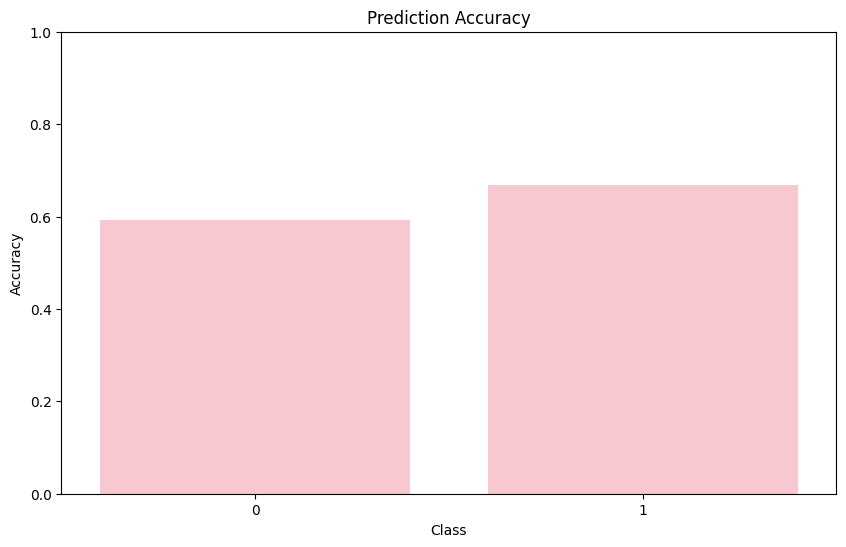

In [239]:
class_accuracy = knn_test.diagonal() / knn_test.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x = knn.classes_, y= class_accuracy, color='pink')
plt.title('Prediction Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Logistic Regression**

In [240]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [241]:
y_pred_lr = log.predict(X_test)

In [242]:
test_data_accuracy_lr = accuracy_score(y_test,y_pred_lr)
print(f"Accuracy score: {test_data_accuracy_lr}")
print("Precision score: ", precision_score(y_test,y_pred_lr))
print("Recall score: ", recall_score(y_test,y_pred_lr))
print("F1 score: ", f1_score(y_test,y_pred_lr))

Accuracy score: 0.9436619718309859
Precision score:  0.95
Recall score:  0.9366197183098591
F1 score:  0.9432624113475176


In [243]:
confusion_matrix(y_test, y_pred_lr)

array([[135,   7],
       [  9, 133]])

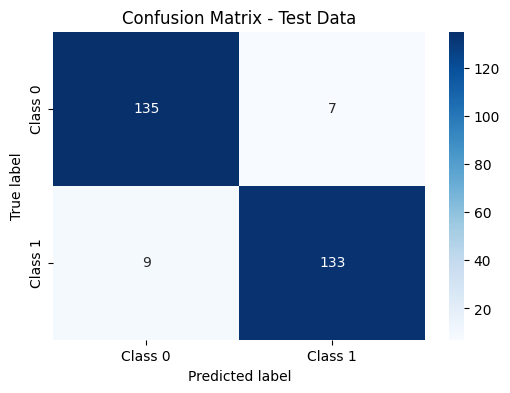

In [244]:
logistic_regression_test = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_regression_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

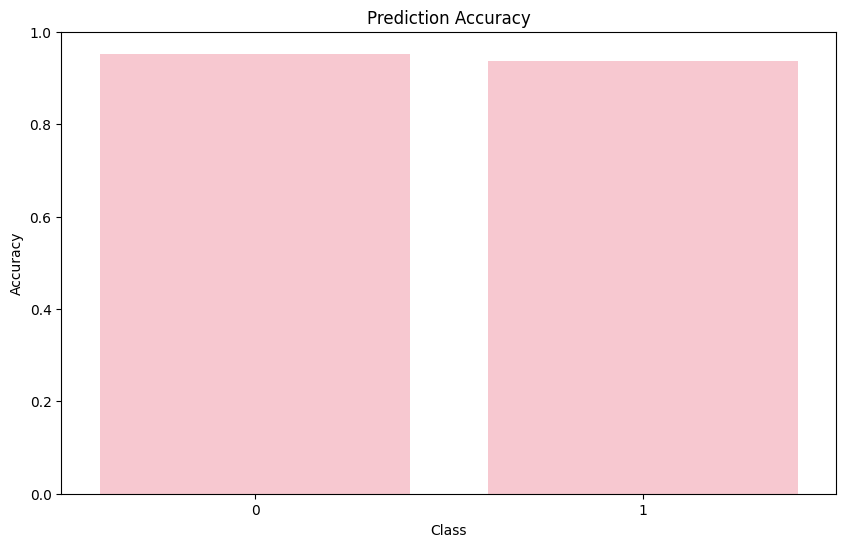

In [245]:
class_accuracy = logistic_regression_test.diagonal() / logistic_regression_test.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x = log.classes_, y= class_accuracy, color='pink')
plt.title('Prediction Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Bar models showcasing prediction accuracy of all models**

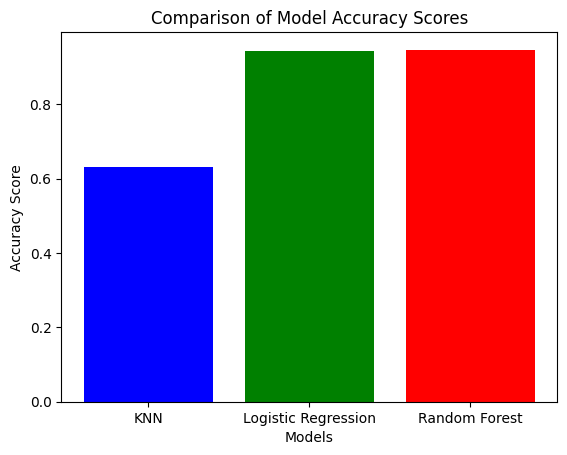

In [246]:
accuracy_scores = [test_data_accuracy_knn, test_data_accuracy_lr, test_data_accuracy_rfc]
models = ['KNN', 'Logistic Regression', 'Random Forest']

plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')

plt.show()

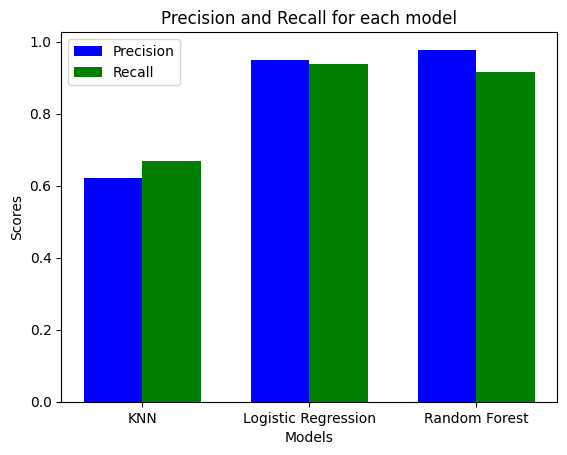

In [247]:
predictions = [y_pred_knn, y_pred_lr, y_pred_rfc]
models = ['KNN', 'Logistic Regression', 'Random Forest']

# Calculate precision and recall for each model
precision_scores = [precision_score(y_test, pred) for pred in predictions]
recall_scores = [recall_score(y_test, pred) for pred in predictions]

# Create a bar chart
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, precision_scores, width, label='Precision', color='blue')
rects2 = ax.bar(x + width/2, recall_scores, width, label='Recall', color='green')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall for each model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the chart
plt.show()